영상 데이터 전처리
- opencv-python
- seaborn
- numpy
- matplotlib
- scikit-learn
이 설치 되어야 한다.

In [44]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split #데이터 전처리 - train, test 분리 random_state=42
from sklearn.neighbors import KNeighborsClassifier #분류/ 데이터 학습하기
from sklearn.neighbors import KNeighborsRegressor  #회귀 예측
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression #선형회귀
from sklearn.preprocessing import PolynomialFeatures #끝난 뒤 특성을 추가해서 모델을 적용
from sklearn.preprocessing import StandardScaler #표준화작업 (instead of 데이터값 - 평균/ 표준편차) - 전처리 전
from sklearn.linear_model import Ridge #릿지회귀
from scipy.special import softmax # 행 하나하나 1로 맞춤
from sklearn.linear_model import LogisticRegression #로지스틱 - 맞출 확률을 나타내는 것(1에 가깝게)
from sklearn.linear_model import SGDClassifier #경사하강법 - 머신러닝을 훈련하는 방법, 다 끝나고 정답률 높이기 위해 
from statsmodels.stats.outliers_influence import variance_inflation_factor #회귀분석 예측 - 고려사항 체크
import statsmodels.api as sm # train set 평가서 볼 수 있는 모듈
from sklearn.model_selection import cross_validate # 머신러닝 - cross_validate
from sklearn.ensemble import RandomForestClassifier
from collections import Counter #counter 함수
from sklearn.feature_extraction.text import CountVectorizer # 전체단어에서 각 단어에 번호를 생성부여
from scipy import stats # t-test
from tensorflow import keras
from konlpy.tag import Okt  #텍스트마이닝
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs  # svm
import operator
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import oracledb
import random
import seaborn as sns
import glob,os.path,re
import seaborn as sns
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [45]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

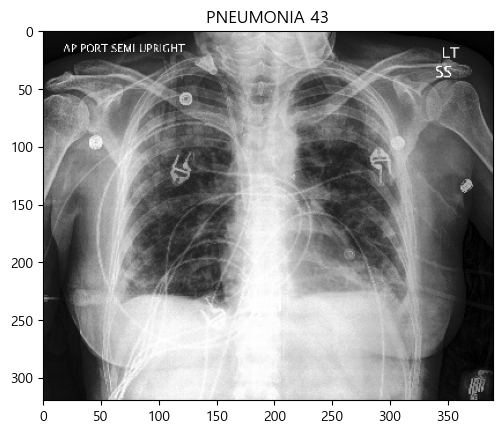

In [46]:
# 샘플 이미지 시각화
data_dir = '../data/pneumonia/Positive/'
categories = ['train','test','val'] #전처리된 데이터셋을 훈련용, 평가용, 검증용으로 구분
img_name = os.listdir(data_dir)[42]
img_path = os.path.join(data_dir, img_name)
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap = 'gray')
plt.title(f'PNEUMONIA 43')
plt.show()

1. Image Resize\
return cv2.resize(img, size)

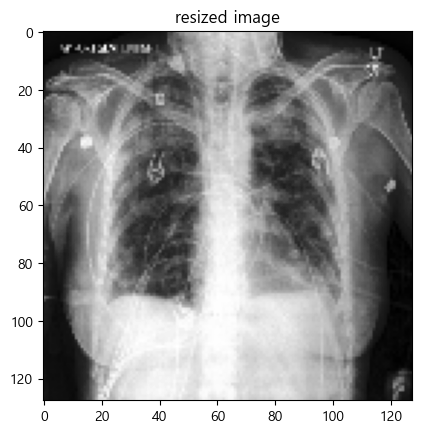

In [47]:
def resize_image(img,size=(128,128)):  #가로세로 값 같도록 설정
    return cv2.resize(img, size)

resize_image = resize_image(img)
plt.imshow(resize_image, cmap='gray')
plt.title('resized image')
plt.show()
# padding: 더 긴 값을 기준으로 0을 붙임

2. Histrogram Equlization
- image level 평활화

In [48]:
?cv2.equalizeHist

Docstring:
equalizeHist(src[, dst]) -> dst
.   @brief Equalizes the histogram of a grayscale image.
.   
.   The function equalizes the histogram of the input image using the following algorithm:
.   
.   - Calculate the histogram \f$H\f$ for src .
.   - Normalize the histogram so that the sum of histogram bins is 255.
.   - Compute the integral of the histogram:
.   \f[H'_i =  \sum _{0  \le j < i} H(j)\f]
.   - Transform the image using \f$H'\f$ as a look-up table: \f$\texttt{dst}(x,y) = H'(\texttt{src}(x,y))\f$
.   
.   The algorithm normalizes the brightness and increases the contrast of the image.
.   
.   @param src Source 8-bit single channel image.
.   @param dst Destination image of the same size and type as src .
Type:      builtin_function_or_method

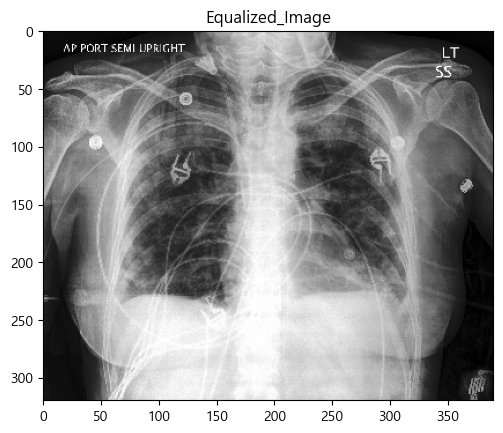

In [49]:
def he_img(img):
    return cv2.equalizeHist(img)
equalized_img = he_img(img)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized_Image')
plt.show()

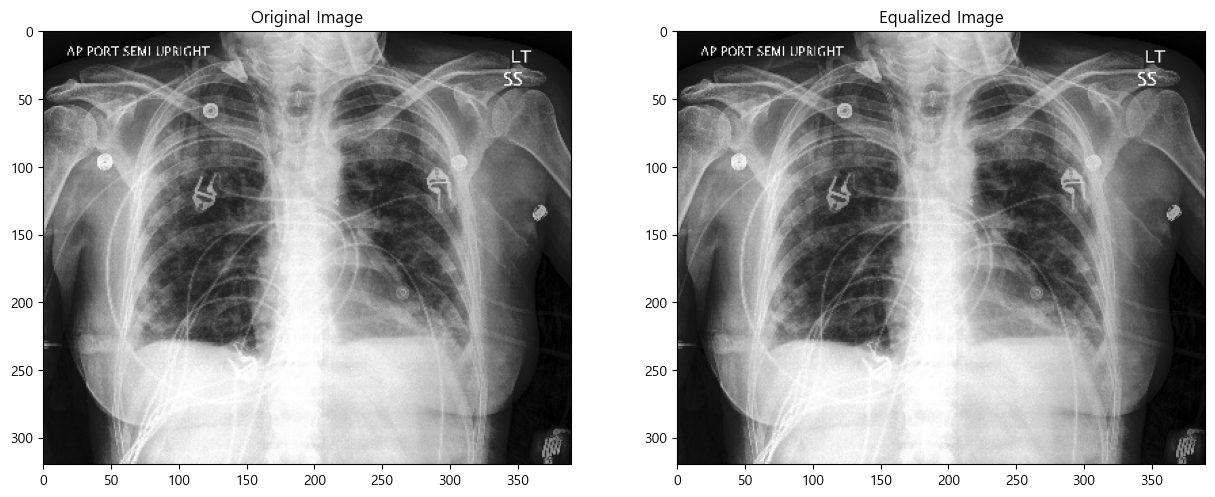

In [50]:
equalized_img = he_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.show()

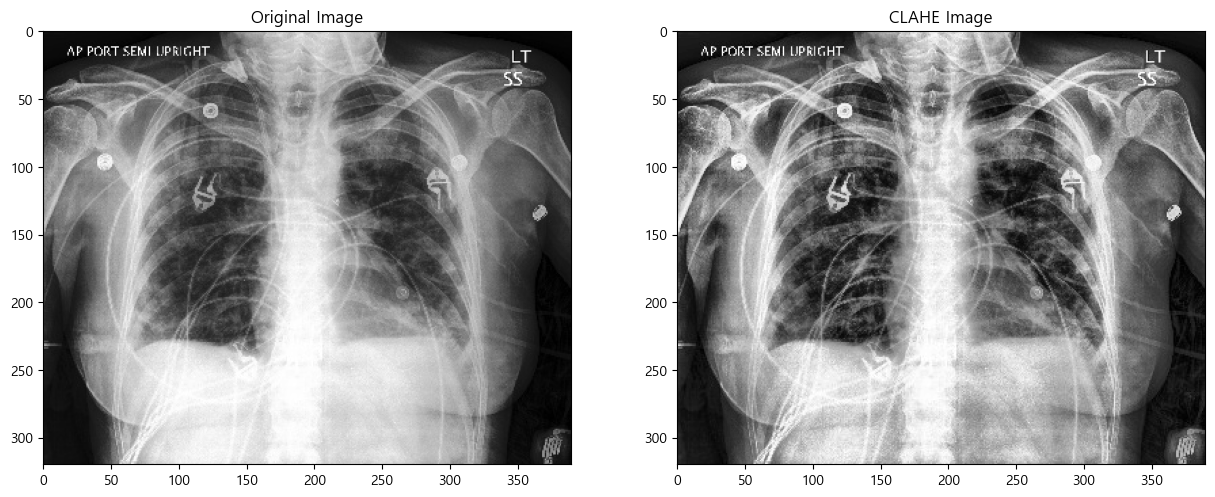

In [51]:
# histogram equalization CLAHE(Contrast Limited Adaptive Histogram Equalization)
# 흐릿한 이미지 강조
def clahe_image(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl_img = clahe.apply(img)
    return cl_img


plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(clahe_image(img), cmap='gray')
plt.title('CLAHE Image')
plt.show()

3. Data Augmentation
- 데이터의 수를 증가시켜 학습, 평가용 데이터를 추가 확보(데이터의 표본(n수)가 적을 때 주로 사용)

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


4. Noise Reduction

In [53]:
?cv2.fastNlMeansDenoising

Docstring:
fastNlMeansDenoising(src[, dst[, h[, templateWindowSize[, searchWindowSize]]]]) -> dst
.   @brief Perform image denoising using Non-local Means Denoising algorithm
.   <http://www.ipol.im/pub/algo/bcm_non_local_means_denoising/> with several computational
.   optimizations. Noise expected to be a gaussian white noise
.   
.   @param src Input 8-bit 1-channel, 2-channel, 3-channel or 4-channel image.
.   @param dst Output image with the same size and type as src .
.   @param templateWindowSize Size in pixels of the template patch that is used to compute weights.
.   Should be odd. Recommended value 7 pixels
.   @param searchWindowSize Size in pixels of the window that is used to compute weighted average for
.   given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater
.   denoising time. Recommended value 21 pixels
.   @param h Parameter regulating filter strength. Big h value perfectly removes noise but also
.   removes image details, small

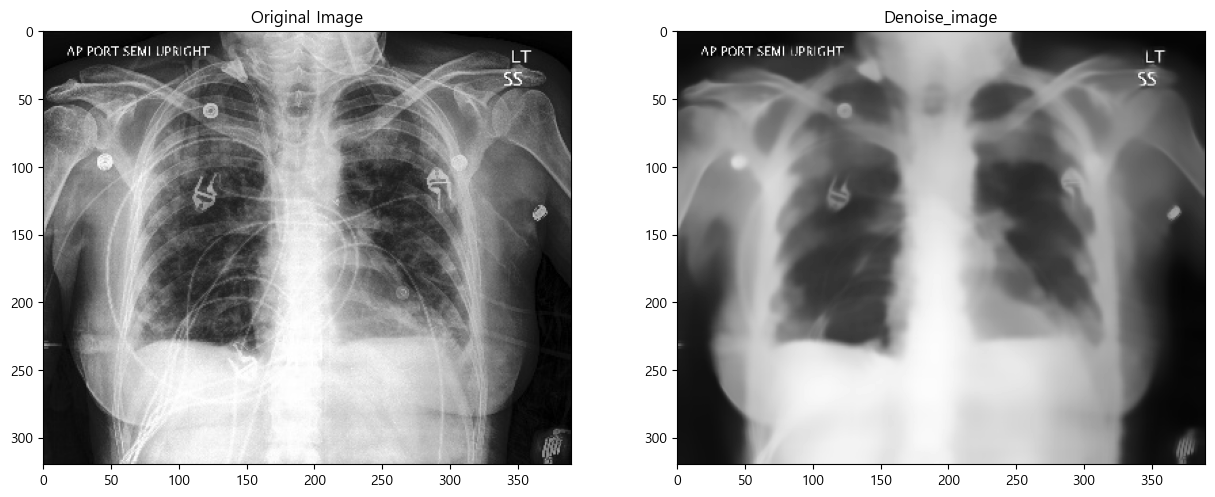

In [54]:
def denoise_img(img):
    return cv2.fastNlMeansDenoising(img, None, 30,7,21)

denoise_img = denoise_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(denoise_img, cmap='gray')
plt.title('Denoise_image')
plt.show()

5. Image Normalization
- 데이터 정규화 처리 -> 극단적인 값을 줄이기 위함
- 연산 효율 높이고 정규성을 생성

In [55]:
?cv2.normalize

Docstring:
normalize(src, dst[, alpha[, beta[, norm_type[, dtype[, mask]]]]]) -> dst
.   @brief Normalizes the norm or value range of an array.
.   
.   The function cv::normalize normalizes scale and shift the input array elements so that
.   \f[\| \texttt{dst} \| _{L_p}= \texttt{alpha}\f]
.   (where p=Inf, 1 or 2) when normType=NORM_INF, NORM_L1, or NORM_L2, respectively; or so that
.   \f[\min _I  \texttt{dst} (I)= \texttt{alpha} , \, \, \max _I  \texttt{dst} (I)= \texttt{beta}\f]
.   
.   when normType=NORM_MINMAX (for dense arrays only). The optional mask specifies a sub-array to be
.   normalized. This means that the norm or min-n-max are calculated over the sub-array, and then this
.   sub-array is modified to be normalized. If you want to only use the mask to calculate the norm or
.   min-max but modify the whole array, you can use norm and Mat::convertTo.
.   
.   In case of sparse matrices, only the non-zero values are analyzed and transformed. Because of this,
.   the range 

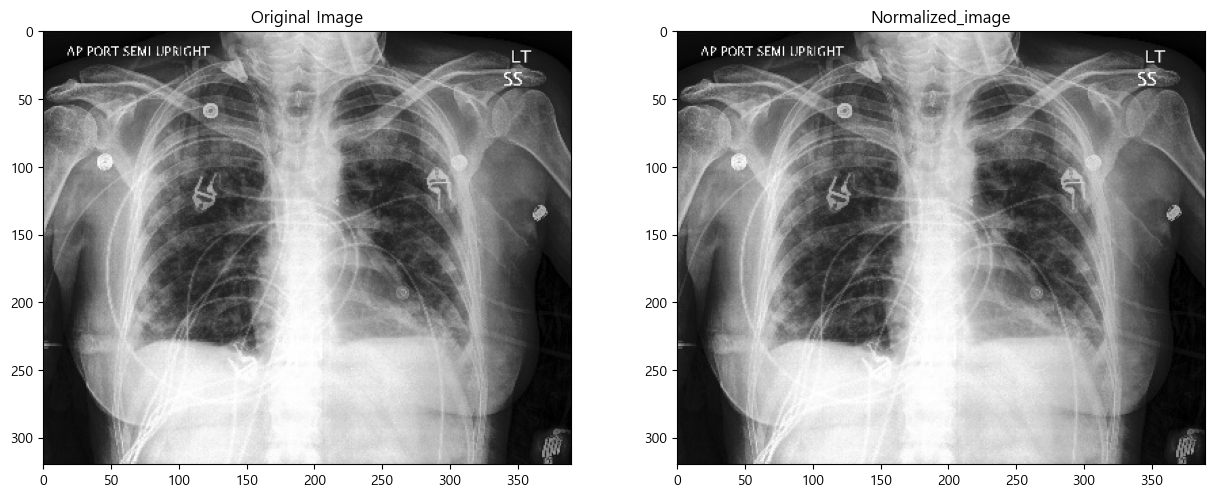

In [56]:
def normalized_img(img):
    return cv2.normalize(img, None, 0 ,255, cv2.NORM_MINMAX)

normalized_img = normalized_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(normalized_img, cmap='gray')
plt.title('Normalized_image')
plt.show()
# 원본 이미지는 변한 게 없어도 수치 값은 변화가 있음

6. Edge Detection

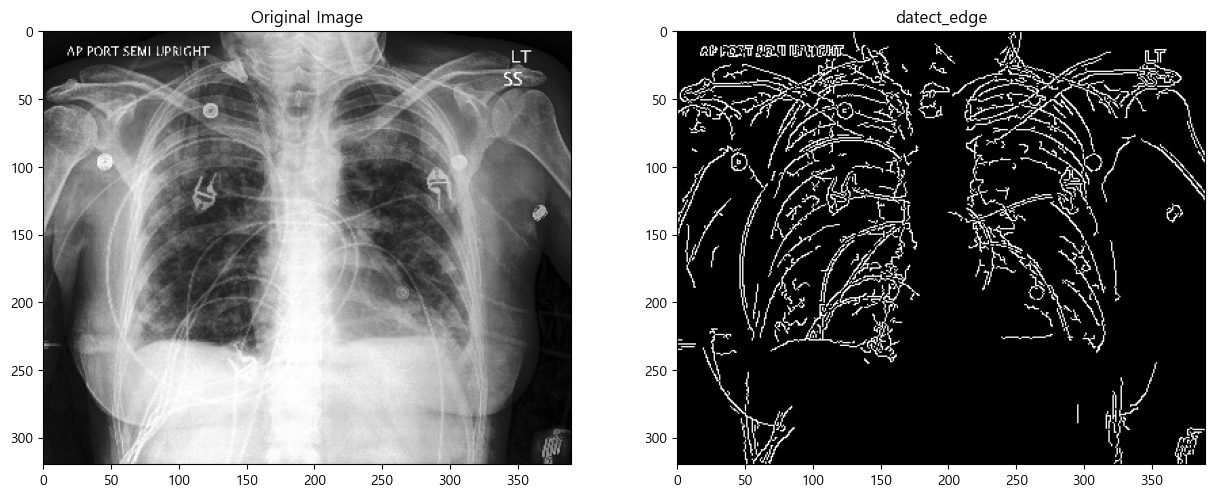

In [57]:
def datect_edge(img):
    return cv2.Canny(img,100,200)  #100,200 사이의 경계선을 잡아낸다


datect_edge_img = datect_edge(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(datect_edge_img, cmap='gray')
plt.title('datect_edge')
plt.show()

7. Blurring

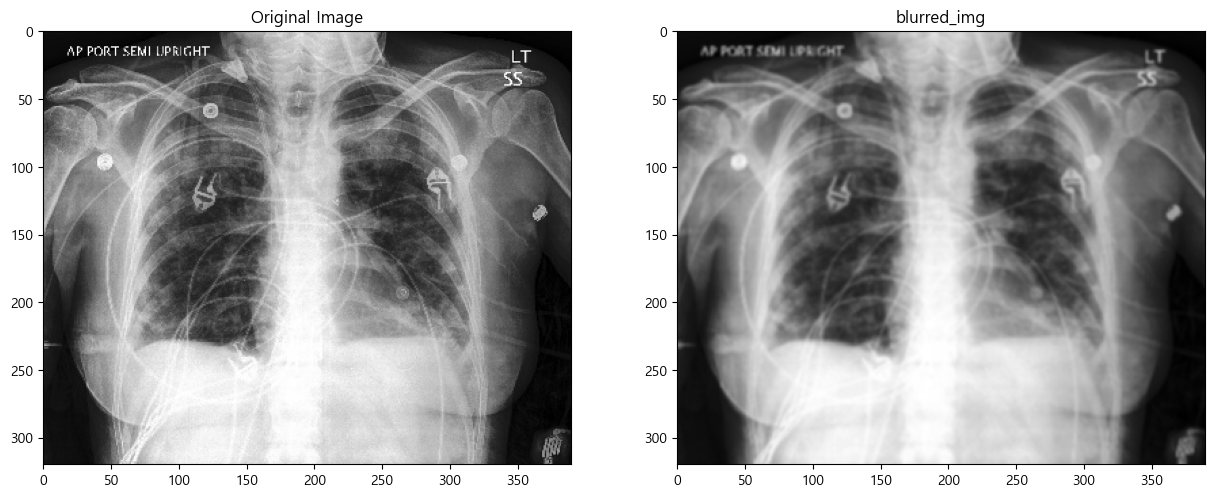

In [58]:
def blur_img(img):
    return cv2.GaussianBlur(img, (5,5),0)  #Gaussian = 정규분포 GaussianBlur->균등하게 blur 처리

blurred_img = blur_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(blurred_img, cmap='gray')
plt.title('blurred_img')
plt.show()

8. Contour Detection
- contour 윤곽선을 overlay -> 특정 부분을 자르거나 더 분석할 때

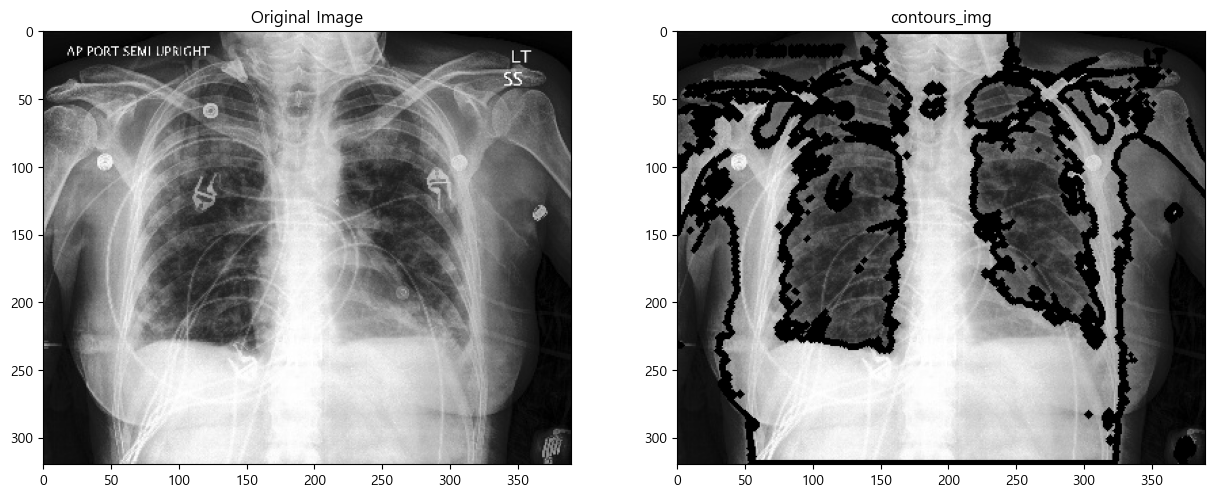

In [59]:
def find_contour(img):
    ret, thresh = cv2.threshold(img, 127,255,0)
    contours, hiearchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

contours = find_contour(img)
contours_img = cv2.drawContours(img.copy(), contours, -1, (0,255,0), 3)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(contours_img, cmap='gray')
plt.title('contours_img')
plt.show()

Data Preparing

In [60]:
def load_data(data_dir):
    images = []

    for img_path in os.listdir(data_dir):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = resize_image(img)
        img = clahe_image(img)
        img = normalized_img(img)
        images.append(img)
        
    prepared_datas = np.array(images)
    return prepared_datas

In [61]:
%whos  # reset은 식별자 다 날림

No variables match your requested type.
